<a href="https://colab.research.google.com/github/LuanK63/6351071043_LAB2/blob/main/6351071043_LAB2_Bai6(Trang27).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nguyễn Thành Luân - 6351071043

4. Tải dữ liệu và Tách thuộc tính/nhãn

In [12]:
import pandas as pd
import numpy as np
columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
           'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
           'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
           'stalk-surface-below-ring', 'stalk-color-above-ring',
           'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
           'ring-type', 'spore-print-color', 'population', 'habitat']

data = pd.read_csv('mushrooms.csv', names=columns, header=None)

print("Nguyễn Thành Luân - 6351071043")
print("Kích thước ban đầu:", data.shape)

data.replace('?', np.nan, inplace=True)
data.dropna(inplace=True)
print("Kích thước sau khi xóa dòng chứa '?':", data.shape)

X_raw = data.drop('class', axis=1)
y_raw = data['class']

print("\nFeatures shape:", X_raw.shape)
print("Labels shape:", y_raw.shape)
print("Các lớp trong labels:", y_raw.unique())

Nguyễn Thành Luân - 6351071043
Kích thước ban đầu: (8125, 23)
Kích thước sau khi xóa dòng chứa '?': (5645, 23)

Features shape: (5645, 22)
Labels shape: (5645,)
Các lớp trong labels: ['class' 'p' 'e']


5.  Chuyển đổi dữ liệu One-hot

Vì toàn bộ dữ liệu nấm là dạng chữ (categorical), ta cần chuyển đổi sang dạng số (One-hot encoding) để thuật toán có thể xử lý.

In [13]:
from sklearn.preprocessing import LabelEncoder

X_onehot = pd.get_dummies(X_raw)

le = LabelEncoder()
y_encoded = le.fit_transform(y_raw)

print("Nguyễn Thành Luân - 6351071043")
print("Kích thước Features sau khi One-hot:", X_onehot.shape)
print("Mapping Label:", dict(zip(le.classes_, le.transform(le.classes_))))
print("\Dữ liệu đã xử lý:")
X_onehot.head()

Nguyễn Thành Luân - 6351071043
Kích thước Features sau khi One-hot: (5645, 120)
Mapping Label: {'class': np.int64(0), 'e': np.int64(1), 'p': np.int64(2)}
\Dữ liệu đã xử lý:


<>:11: SyntaxWarning: invalid escape sequence '\D'
<>:11: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipython-input-1275471715.py:11: SyntaxWarning: invalid escape sequence '\D'
  print("\Dữ liệu đã xử lý:")


,cap-shape_b,cap-shape_c,cap-shape_cap-shape,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_cap-surface,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_habitat,habitat_l,habitat_m,habitat_p,habitat_u
0,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True


6. Chia tập Train/Test

Thực hiện chia dữ liệu theo đúng tỷ lệ đề bài yêu cầu: 70% Train - 30% Test, random_state=42 .

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_onehot, y_encoded, test_size=0.3, random_state=42)

print("Nguyễn Thành Luân - 6351071043")
print("Kích thước tập huấn luyện (X_train):", X_train.shape)
print("Kích thước tập kiểm thử (X_test):", X_test.shape)

Nguyễn Thành Luân - 6351071043
Kích thước tập huấn luyện (X_train): (3951, 120)
Kích thước tập kiểm thử (X_test): (1694, 120)


7. Cây quyết định ID3

Xây dựng cây ID3, đánh giá và vẽ cây .

Nguyễn Thành Luân - 6351071043
Accuracy (ID3): 1.0

Report:
                precision    recall  f1-score   support

   e (Edible)       1.00      1.00      1.00      1061
p (Poisonous)       1.00      1.00      1.00       633

     accuracy                           1.00      1694
    macro avg       1.00      1.00      1.00      1694
 weighted avg       1.00      1.00      1.00      1694

Nguyễn Thành Luân - 6351071043


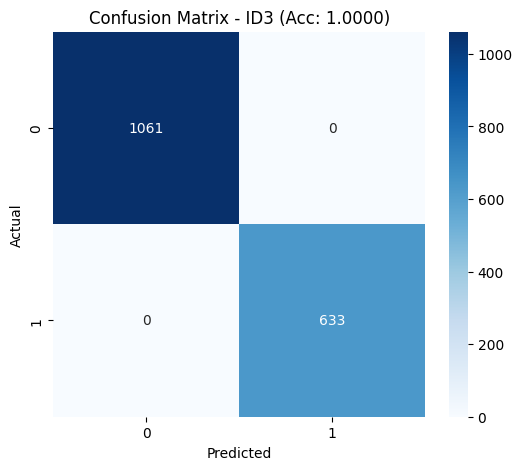

Nguyễn Thành Luân - 6351071043


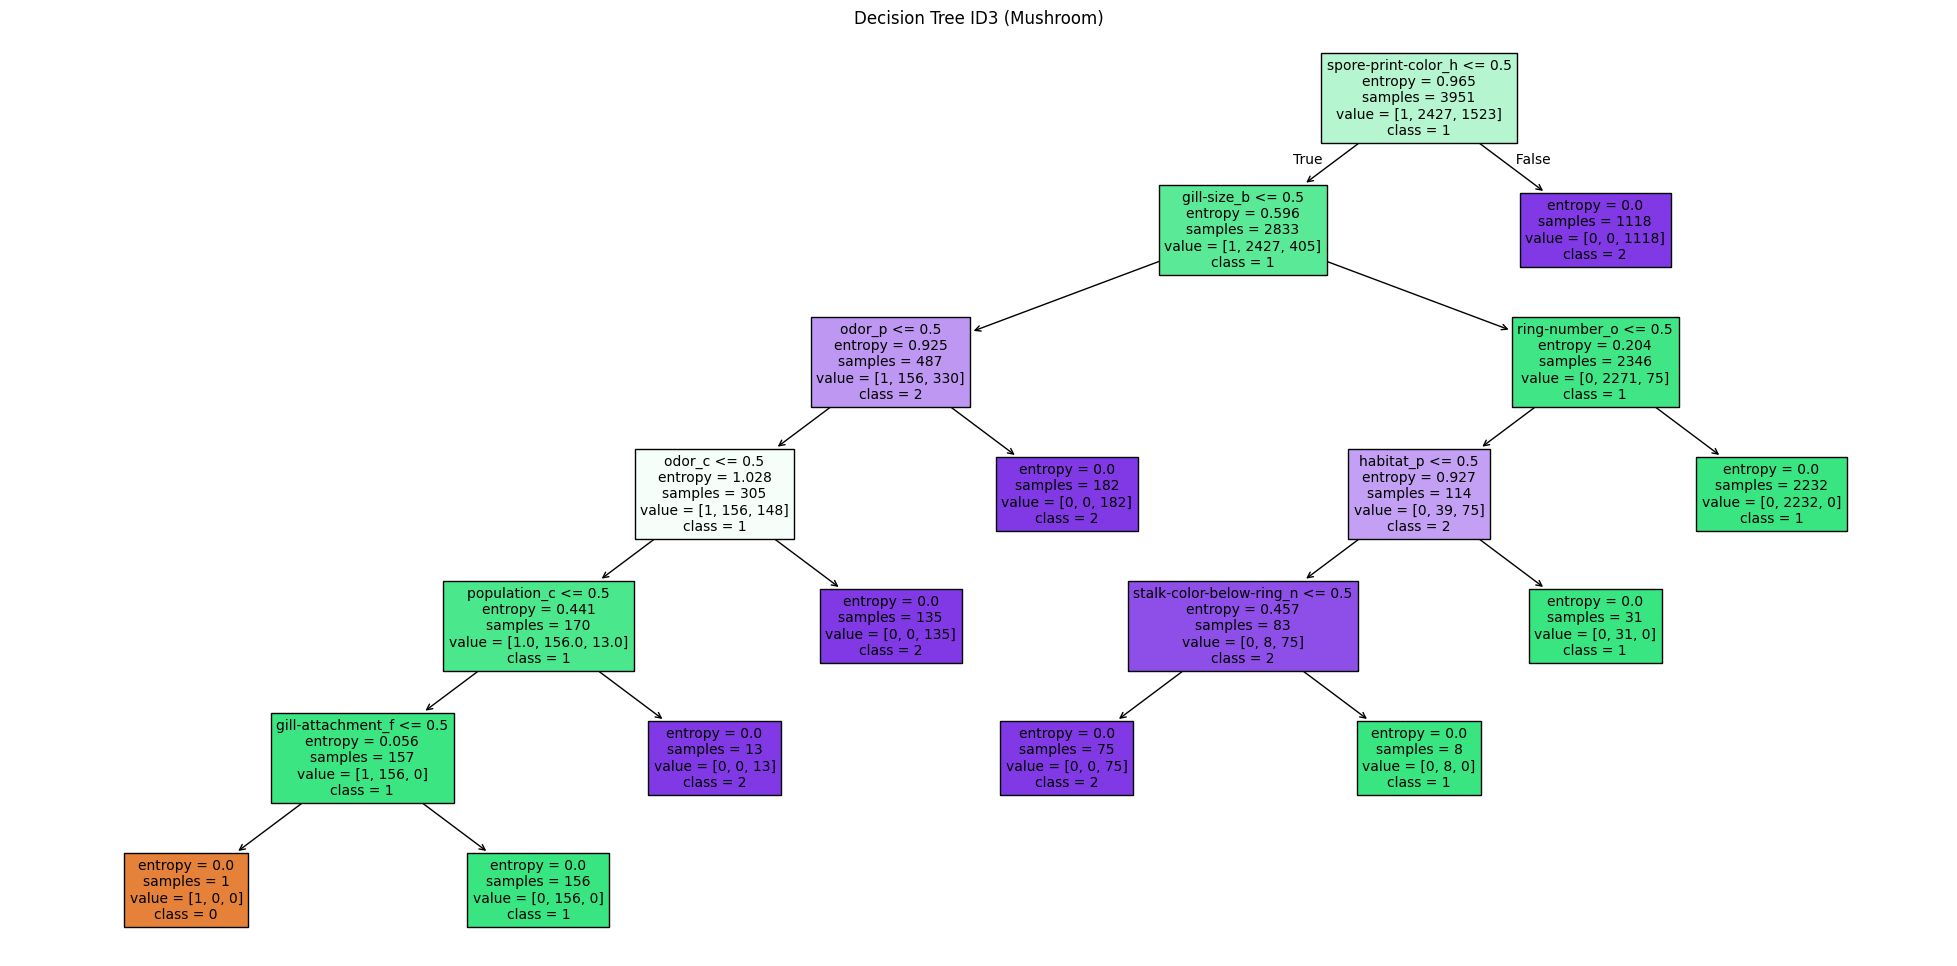

In [17]:
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

clf_id3 = tree.DecisionTreeClassifier(criterion="entropy", random_state=42)
clf_id3.fit(X_train, y_train)


id3_pred = clf_id3.predict(X_test)

print("Nguyễn Thành Luân - 6351071043")
id3_score = metrics.accuracy_score(y_test, id3_pred)
print("Accuracy (ID3):", id3_score)
print("\nReport:\n", metrics.classification_report(y_test, id3_pred, target_names=['e (Edible)', 'p (Poisonous)']))

print("Nguyễn Thành Luân - 6351071043")
plt.figure(figsize=(6, 5))
sns.heatmap(metrics.confusion_matrix(y_test, id3_pred), annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix - ID3 (Acc: {id3_score:.4f})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


print("Nguyễn Thành Luân - 6351071043")
class_names_auto = [str(c) for c in clf_id3.classes_]

if len(class_names_auto) == 2:
    class_names_display = ['e (Edible)', 'p (Poisonous)']
else:
    class_names_display = class_names_auto

plt.figure(figsize=(25, 12))
tree.plot_tree(clf_id3,
               feature_names=X_onehot.columns.tolist(),
               class_names=class_names_display,
               filled=True,
               fontsize=10)

plt.title("Decision Tree ID3 (Mushroom)")
plt.savefig('mushroom_id3.png', dpi=100)
plt.show()

8. Cây quyết định CART

Xây dựng cây CART (gini), đánh giá và vẽ cây

Nguyễn Thành Luân - 6351071043
Accuracy (CART): 1.0


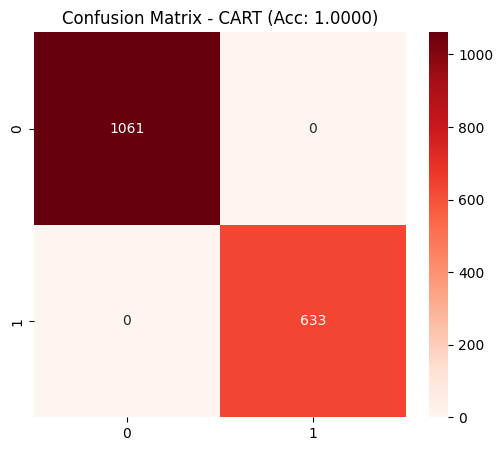

Nguyễn Thành Luân - 6351071043
Các lớp mô hình học được: ['0', '1', '2']


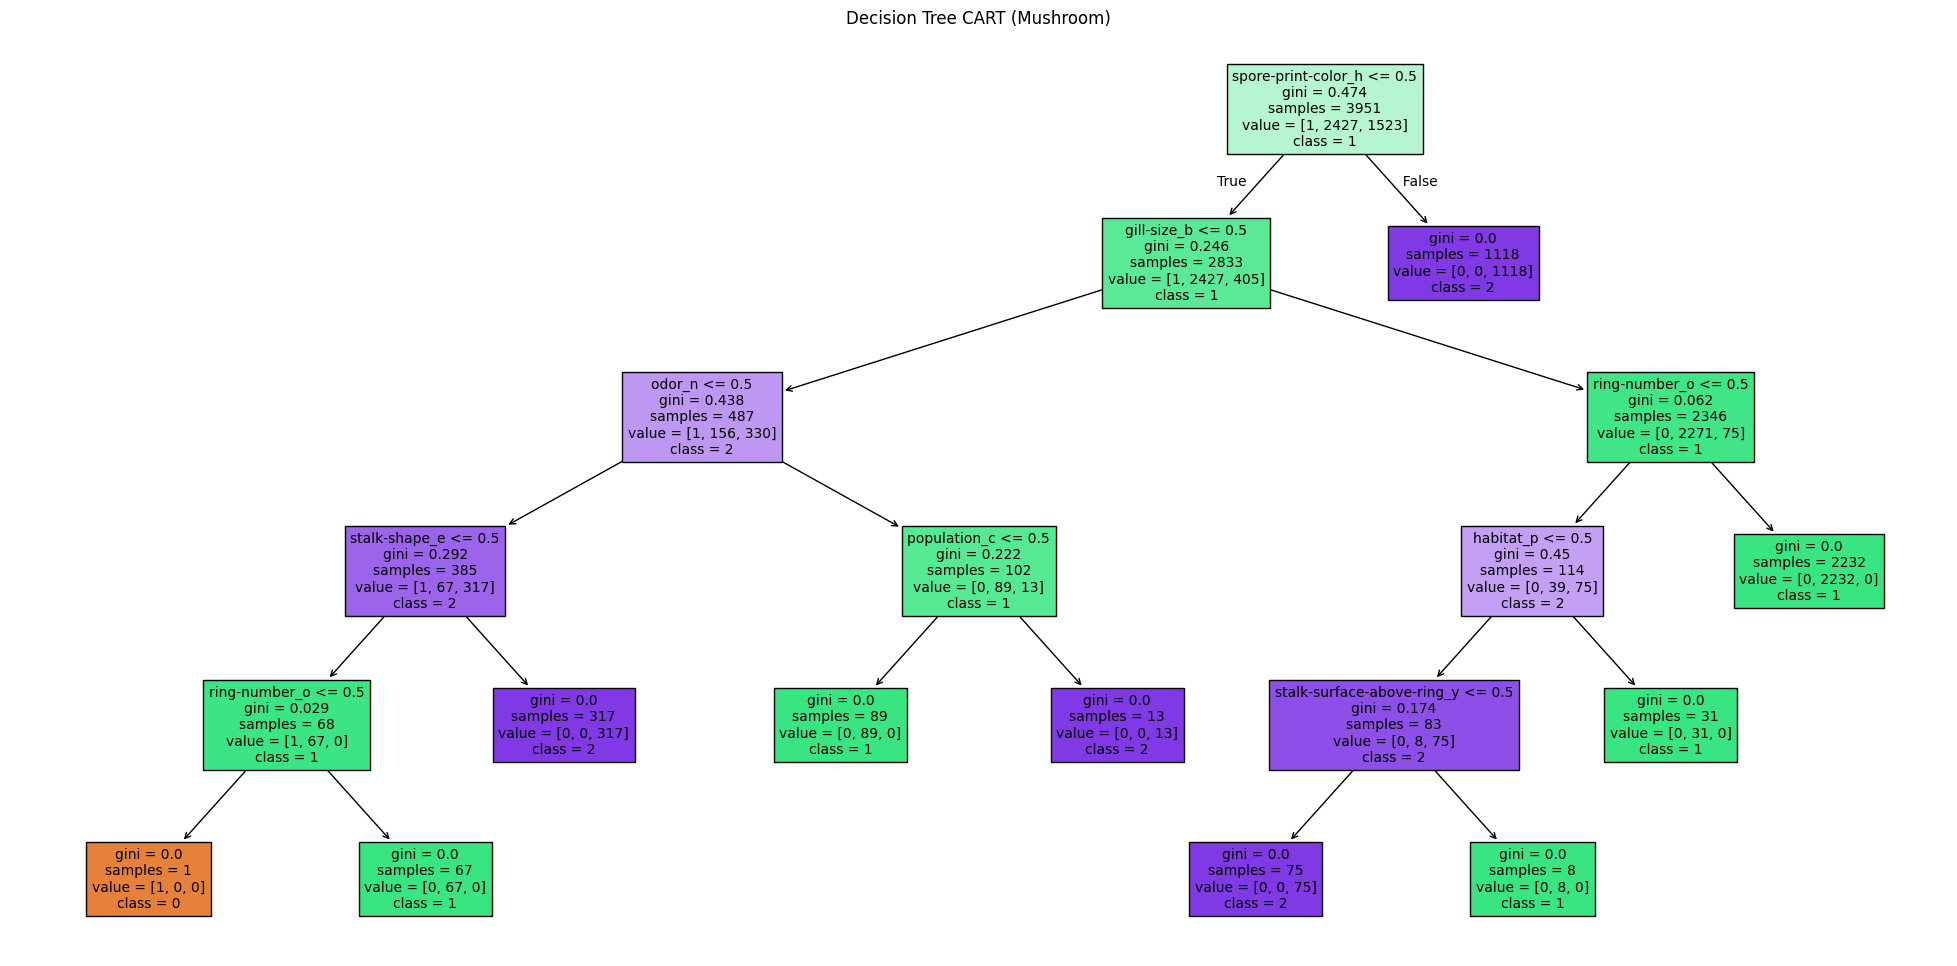

In [19]:
clf_cart = tree.DecisionTreeClassifier(criterion="gini", random_state=42)
clf_cart.fit(X_train, y_train)

cart_pred = clf_cart.predict(X_test)

print("Nguyễn Thành Luân - 6351071043")
cart_score = metrics.accuracy_score(y_test, cart_pred)
print("Accuracy (CART):", cart_score)

plt.figure(figsize=(6, 5))
sns.heatmap(metrics.confusion_matrix(y_test, cart_pred), annot=True, fmt="d", cmap="Reds")
plt.title(f"Confusion Matrix - CART (Acc: {cart_score:.4f})")
plt.show()

print("Nguyễn Thành Luân - 6351071043")
class_names_raw = [str(c) for c in clf_cart.classes_]

if len(class_names_raw) == 2:
    class_names_display = ['e (Edible)', 'p (Poisonous)']
else:
    class_names_display = class_names_raw

print(f"Các lớp mô hình học được: {class_names_display}")

plt.figure(figsize=(25, 12))
tree.plot_tree(clf_cart,
               feature_names=X_onehot.columns.tolist(),
               class_names=class_names_display,
               filled=True,
               fontsize=10)

plt.title("Decision Tree CART (Mushroom)")
plt.savefig('mushroom_cart.png', dpi=100)
plt.show()

9. Thuật toán Naïve Bayes

Xây dựng và đánh giá mô hình Naïve Bayes.

Nguyễn Thành Luân - 6351071043
Accuracy (Naïve Bayes): 0.9982290436835891

Report:
                precision    recall  f1-score   support

   e (Edible)       1.00      1.00      1.00      1061
p (Poisonous)       1.00      1.00      1.00       633

     accuracy                           1.00      1694
    macro avg       1.00      1.00      1.00      1694
 weighted avg       1.00      1.00      1.00      1694

Nguyễn Thành Luân - 6351071043


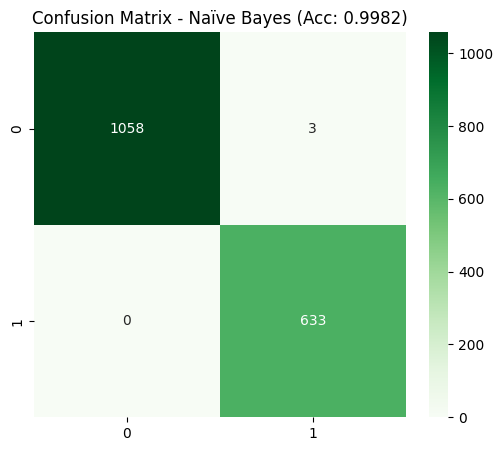

In [20]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

bayes_pred = gnb.predict(X_test)

print("Nguyễn Thành Luân - 6351071043")
bayes_score = metrics.accuracy_score(y_test, bayes_pred)
print("Accuracy (Naïve Bayes):", bayes_score)
print("\nReport:\n", metrics.classification_report(y_test, bayes_pred, target_names=['e (Edible)', 'p (Poisonous)']))

print("Nguyễn Thành Luân - 6351071043")
plt.figure(figsize=(6, 5))
sns.heatmap(metrics.confusion_matrix(y_test, bayes_pred), annot=True, fmt="d", cmap="Greens")
plt.title(f"Confusion Matrix - Naïve Bayes (Acc: {bayes_score:.4f})")
plt.show()

10. So sánh kết quả

Tổng hợp kết quả và nhận xét.

Nguyễn Thành Luân - 6351071043
         Model  Accuracy
0          ID3  1.000000
1         CART  1.000000
2  Naïve Bayes  0.998229


/tmp/ipython-input-1175805330.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results, palette='viridis')


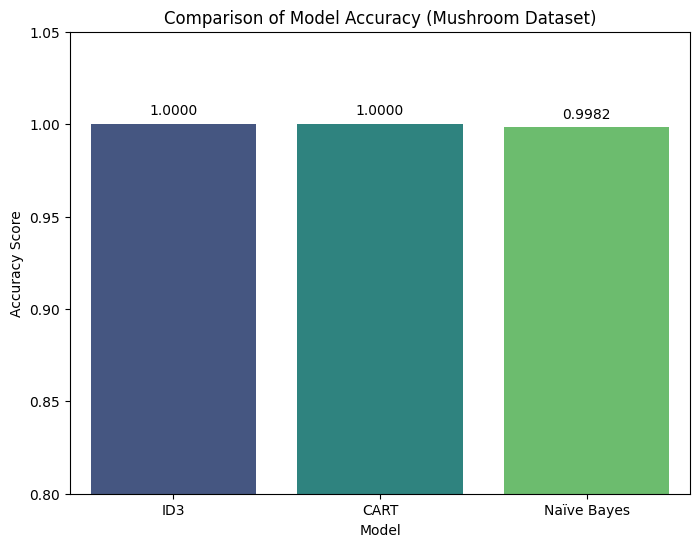

Nguyễn Thành Luân - 6351071043


In [21]:
results = pd.DataFrame({
    'Model': ['ID3', 'CART', 'Naïve Bayes'],
    'Accuracy': [id3_score, cart_score, bayes_score]
})

print("Nguyễn Thành Luân - 6351071043")
print(results)

plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=results, palette='viridis')
plt.ylim(0.8, 1.05)
plt.title('Comparison of Model Accuracy (Mushroom Dataset)')
plt.ylabel('Accuracy Score')
for index, row in results.iterrows():
    plt.text(index, row.Accuracy + 0.005, f"{row.Accuracy:.4f}", color='black', ha="center")
plt.show()
print("Nguyễn Thành Luân - 6351071043")